## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [112]:
import pandas as pd
student = pd.read_csv('students-data.csv',delimiter=';')

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
student.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [115]:
import numpy as np
student['number']=np.arange(0,395)
student.set_index('number',inplace=True)

In [116]:
# will perform info on the dataframe to identify any null values if present.
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [123]:
student.select_dtypes(include='object',exclude=np.number).head(2)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [124]:
tmp = student.select_dtypes(include=np.number,exclude='object')
for i in tmp:
    tmp1=student[i].var()<1
    #student.drop((student[i].var()==tmp1),axis=i)
    print(tmp1)
    
#student.var()

False
False
False
True
True
True
True
True
False
True
False
False
False
False
False
False


In [125]:
tmplist = ['traveltime','studytime','failures','famrel','freetime','Dalc']
tmp = student.drop(tmplist,axis=1)
tmp.shape

(395, 27)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [126]:
from sklearn.preprocessing import LabelEncoder
lbenc = LabelEncoder()
student1 = pd.get_dummies(student,prefix_sep='_',drop_first=True)

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [127]:
#Let's create 3 columns with that will hold results of G1, G2 & G3 with value "1" as "pass" and value "0" as "fail"
student1['G1Result']=np.where(student1['G1']>=10, 1, 0)
student1['G2Result']=np.where(student1['G2']>=10, 1, 0)
student1['G3Result']=np.where(student1['G3']>=10, 1, 0)

student1.head(10)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G1Result,G2Result,G3Result
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,1,1,0,0,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,0,1,1,0,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,1,1,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,1,1,1,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,1,0,1,1,0,0,0,1,1
5,16,4,3,1,2,0,5,4,2,1,...,1,1,1,1,1,1,0,1,1,1
6,16,2,2,1,2,0,4,4,4,1,...,0,0,0,1,1,1,0,1,1,1
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,1,0,0,0,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,1,0,1,1,1,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [128]:
X = student1.drop(['G3'],axis=1)
y = student1['G3']
print(X.head(2))
print(y.head(2))

        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
number                                                                       
0        18     4     4           2          2         0       4         3   
1        17     1     1           1          2         0       5         3   

        goout  Dalc  ...  famsup_yes  paid_yes  activities_yes  nursery_yes  \
number               ...                                                      
0           4     1  ...           0         0               0            1   
1           3     1  ...           1         0               0            0   

        higher_yes  internet_yes  romantic_yes  G1Result  G2Result  G3Result  
number                                                                        
0                1             0             0         0         0         0  
1                1             1             0         0         0         0  

[2 rows x 44 columns]
number
0    6
1    6
Name: G3, 

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

Text(0.5, 1.0, 'Scatter plot between G2 and G3')

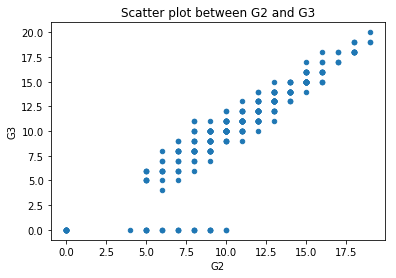

In [129]:
import matplotlib.pyplot as plt
student1.plot.scatter('G2','G3')
plt.title('Scatter plot between G2 and G3')

In [130]:
# Inference: Looking into above scatter plot, it appears that G2 & G3 values are positively correlated, if lower values where 
# G3 is '0' are considered as outliers then from the plot it can be infered that if the student has a good G2 then its highloy 
# likely that he/she has scored equally well in G3 as well.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8


*Plot the number of students in each school and number of students with different ages in separate plots.*

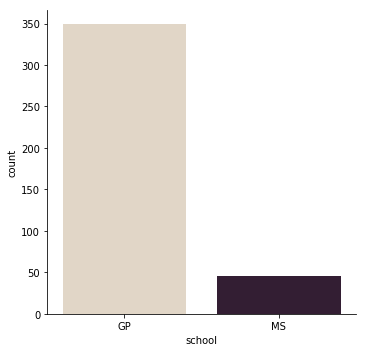

In [131]:
# Plot to observe Number of students in each school
import seaborn as sns
sns.catplot(x='school', kind='count', palette="ch:.25", data=student)

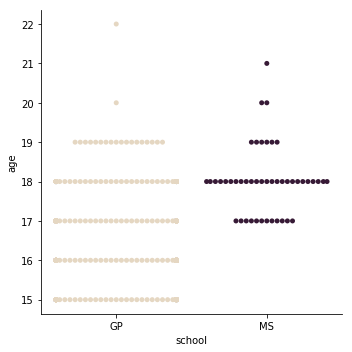

In [132]:
#print('Distinct ages of students:\n',student1['age'].value_counts())
# Plot to observe Age of students in each school
sns.catplot(x="school", y='age',kind='swarm', palette="ch:.25", data=student)

In [133]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [134]:
# Lets split the data by taking G1 as our dependent variable & rest all as individual variables
# We will get rid rid of columns G2 & G3 as well while preparing our training set
from sklearn.model_selection import train_test_split
X = student1.drop(['G1','G2','G3'],axis=1)
y = student1['G1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5) # as total number of records are 395,
# so 300 records approximate to 75%, hence we can leave test size to pick default value
X_train.shape

(296, 42)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
final = LogisticRegression()
final.fit(X_train,y_train)
#predicted = final.predict(X_test)
#conf=confusion_matrix(y_test,predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
# make class predictions for the testing set
y_pred_class = final.predict(X_test)

In [139]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.20202020202020202


# Naive bayes with Iris data

### Import Iris.csv

In [140]:
df = pd.read_csv('iris.csv')
df.head(2)
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [141]:
# lets replace NaN values with the mean of respective columns
import numpy as np
tmp = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in tmp:
    df=df.fillna(np.mean(df[i]))
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.500000,3.000000,5.200000,2.000000,Iris-virginica
148,149,6.200000,3.400000,5.400000,2.300000,Iris-virginica
149,150,5.900000,3.000000,5.100000,1.800000,Iris-virginica
150,151,5.900000,5.843709,5.843709,5.843709,Iris-virginica
151,152,5.843709,5.843709,5.843709,1.800000,Iris-virginica


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.6+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [143]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

### Find the distribution of target variable (Class)

In [144]:
pd.value_counts(y)

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

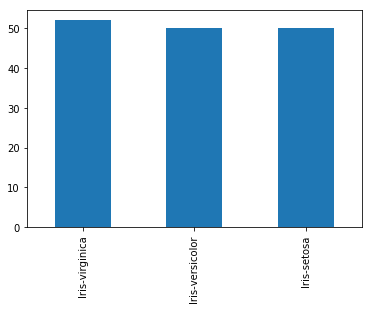

In [145]:
pd.value_counts(df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

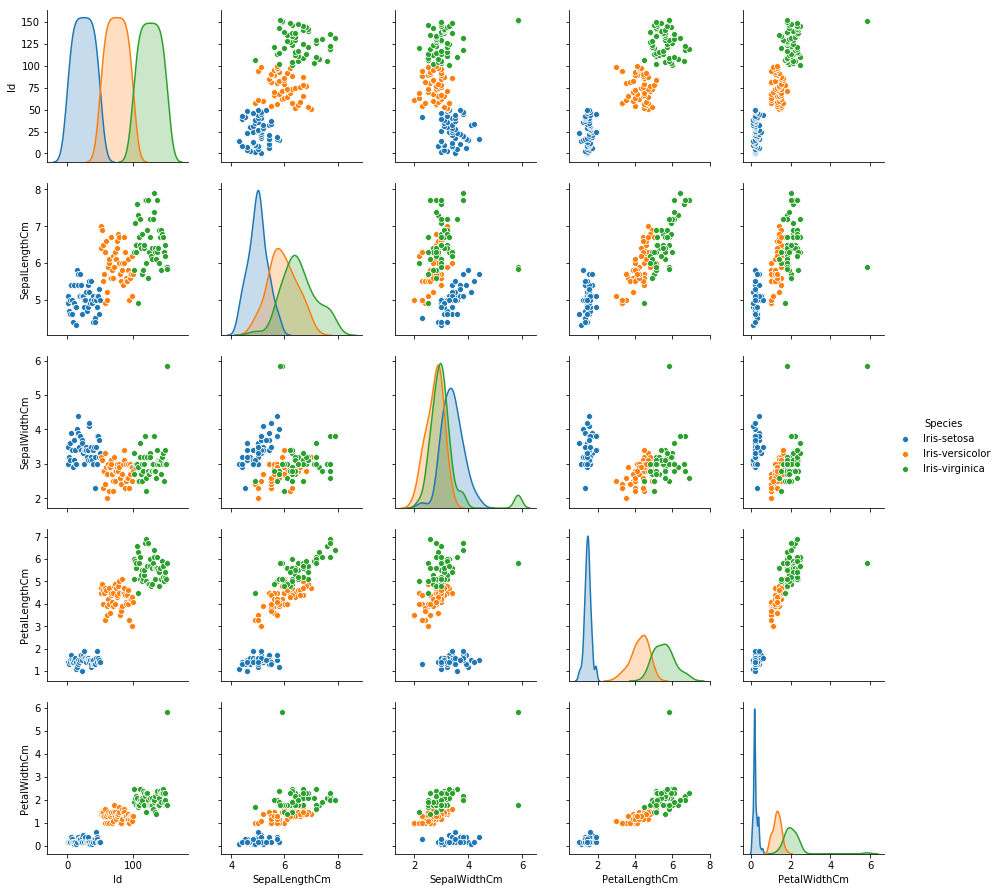

In [146]:
sns.pairplot(df,hue='Species')

In [147]:
# Inference: From above plot, it can be observed that the 'green' & 'orange' dots are comparively correlated as compare to the 
# blue dots, which implies that species 'Iris-versicolor' & 'Iris-virginica' have a good correlation and hence may be difficult
# to differentiate based on different independent parameters

### Summary Statistics and explain insights for at least 2 variables

In [148]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843709,3.090707,3.786101,1.233182
std,44.022721,0.822577,0.535945,1.768833,0.847812
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.400000,1.300000
75%,114.250000,6.400000,3.325000,5.100000,1.800000
max,152.000000,7.900000,5.843709,6.900000,5.843709


In [149]:
# Inference: SepalWidth-> has comparitively less standard deviation then others, hence it can be infered that sepalwidth doesn't
# vary much with the change in category accross flowers
# PetalLength-> has a high standard deviation compared tot others, which implies that petallength varies a lot with the change
# in category of flower

### Correlation among all variables and give your insights

In [150]:
df.corr()
# looking into below output, it can be observed that there is a strong correlation between 'SepalLength', 'PetalLength' &
# Petalwidth, which means a flower with greater sepallength is highly likely to have greater petallength & petalwidth as well.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.703344,-0.195891,0.884086,0.858171
SepalLengthCm,0.703344,1.000000,-0.085534,0.864322,0.733863
SepalWidthCm,-0.195891,-0.085534,1.000000,-0.254667,-0.045705
PetalLengthCm,0.884086,0.864322,-0.254667,1.000000,0.900688
PetalWidthCm,0.858171,0.733863,-0.045705,0.900688,1.000000


### Split data in Training and Validation in 80:20

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Do Feature Scaling

In [152]:
# Let's use standard scalar to perform scaling on train data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ScaledX_train = sc.fit_transform(X_train)

### Train and Fit NaiveBayes Model

In [153]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [154]:
from sklearn.metrics import confusion_matrix
y_pred_class = gb.predict(X_test)
# calculate accuracy
print('The accuracy is:',gb.score(X_test,y_test))

The accuracy is: 0.9032258064516129


In [155]:
confusion_matrix(y_test,y_pred_class)

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  9]], dtype=int64)

In [156]:
# Inference: Looking into the confusion matrix above, it can be seen that the diagonal values are matching with the model
# accuracy.